In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('../data/cleaned/data_final.csv', )
data = data.drop(columns="url")
data.head()


,price,zone,neighborhood,built_area,usable_area,bedrooms,bathrooms,floor,exterior,elevator,garage,storage_room,balcony,new,condition,year,agency,consumption_label,emissions_label,description
0,440000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",76.0,70.000000,2,2,3.0,exterior,True,True,True,True,False,Buen estado,2025.0,ORDUNTE Inmobiliaria,A,A,"GASTOS DE GESTIÓN de 1,5 por ciento + IVA a ca..."
1,442000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",82.0,67.104025,2,2,1.0,exterior,True,True,False,True,True,Nuevo,2025.0,LOIOLA GESTIÓN INMOBILIARIA,A,A,La nueva promoción de Loiola se compone de 42 ...
2,381000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",58.0,44.045770,1,1,4.0,exterior,True,True,False,True,True,Nuevo,2025.0,LOIOLA GESTIÓN INMOBILIARIA,A,A,La nueva promoción de Loiola se compone de 42 ...
3,575000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",104.0,88.240759,3,2,1.0,exterior,True,True,False,True,True,Nuevo,2025.0,LOIOLA GESTIÓN INMOBILIARIA,A,A,La nueva promoción de Loiola se compone de 42 ...
4,306000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",62.0,47.888812,1,1,1.0,exterior,True,True,False,False,True,Nuevo,2025.0,Loiola,A,A,"60 viviendas de obra nueva de 1, 2 y 3 habitac..."


In [2]:
data.info()
fetures = data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1230 non-null   float64
 1   zone               1230 non-null   object 
 2   neighborhood       1230 non-null   object 
 3   built_area         1230 non-null   float64
 4   usable_area        1230 non-null   float64
 5   bedrooms           1230 non-null   int64  
 6   bathrooms          1230 non-null   int64  
 7   floor              1230 non-null   float64
 8   exterior           1230 non-null   object 
 9   elevator           1230 non-null   bool   
 10  garage             1230 non-null   bool   
 11  storage_room       1230 non-null   bool   
 12  balcony            1230 non-null   bool   
 13  new                1230 non-null   bool   
 14  condition          1230 non-null   object 
 15  year               1230 non-null   float64
 16  agency             1230 

In [3]:

columnastring = ["description"]
data[columnastring] = data[columnastring].astype('string') 
columnascategory = ["zone","neighborhood","exterior","condition","agency","consumption_label","emissions_label"]
data[columnascategory] = data[columnascategory].astype('category')
data["year"] = data["year"].round()
data_clustering = data.drop(columns=["description","agency" ])
data_clustering.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   price              1230 non-null   float64 
 1   zone               1230 non-null   category
 2   neighborhood       1230 non-null   category
 3   built_area         1230 non-null   float64 
 4   usable_area        1230 non-null   float64 
 5   bedrooms           1230 non-null   int64   
 6   bathrooms          1230 non-null   int64   
 7   floor              1230 non-null   float64 
 8   exterior           1230 non-null   category
 9   elevator           1230 non-null   bool    
 10  garage             1230 non-null   bool    
 11  storage_room       1230 non-null   bool    
 12  balcony            1230 non-null   bool    
 13  new                1230 non-null   bool    
 14  condition          1230 non-null   category
 15  year               1230 non-null   float64 
 16  consum

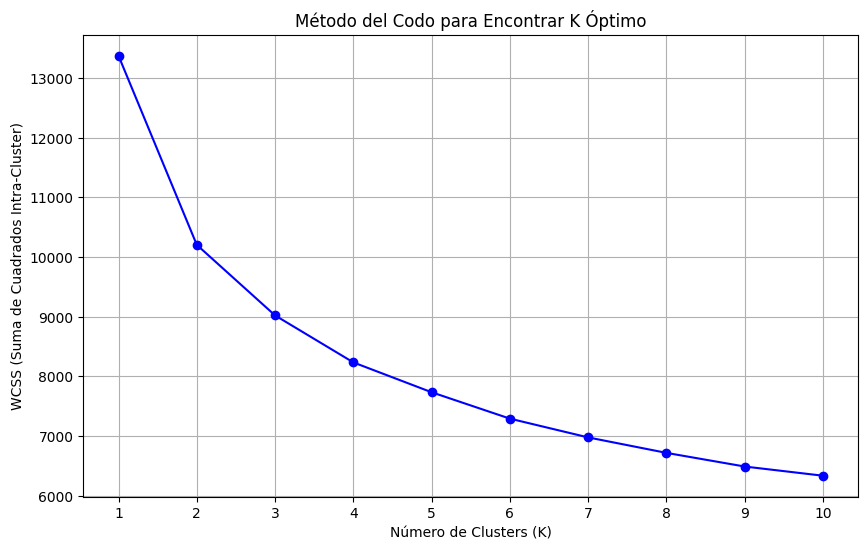

K=2: Silhouette Score = 0.2960
K=3: Silhouette Score = 0.1466
K=4: Silhouette Score = 0.1602
K=5: Silhouette Score = 0.1534
K=6: Silhouette Score = 0.1485
K=7: Silhouette Score = 0.1281
K=8: Silhouette Score = 0.1218
K=9: Silhouette Score = 0.1234
K=10: Silhouette Score = 0.1147
--- Resultado del Análisis de Silueta ---


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

numerical_cols = ['price', 'built_area', 'usable_area', 'bedrooms', 'bathrooms', 'floor', 'year']
categorical_cols = list(data_clustering.select_dtypes(include=['category']).columns)
boolean_cols = list(data_clustering.select_dtypes(include=['bool']).columns)

# A. Codificación One-Hot para Categóricas
data_processed = pd.get_dummies(data_clustering, columns=categorical_cols, drop_first=True)

# B. Convertir Booleanas a Entero (0/1)
for col in boolean_cols:
    data_processed[col] = data_processed[col].astype(int)

# C. Escalado (Estandarización) de Columnas Numéricas
scaler = StandardScaler()
data_processed[numerical_cols] = scaler.fit_transform(data_processed[numerical_cols])

X = data_processed.copy()

# ENCONTRAR K ÓPTIMO ---
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Opcional: Visualización del Método del Codo (guarda el plot)
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='blue')
plt.title('Método del Codo para Encontrar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Suma de Cuadrados Intra-Cluster)')
plt.xticks(K_range)
plt.grid(True)
plt.show()  

#NO SE VE NADA CLARO CUAL ELEGIR, PROBAMOS SILHOUETTE


silhouette_scores = {}
K_range = range(2, 11) 


for k in K_range:
    # Entrenar K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    # Calcular el Silhouette Score
    score = silhouette_score(X, cluster_labels)
    silhouette_scores[k] = score
    print(f"K={k}: Silhouette Score = {score:.4f}")

# Encontrar el K con la puntuación más alta
K_optimal_silhouette = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[K_optimal_silhouette]

print("--- Resultado del Análisis de Silueta ---")
#RESULTADOS MUY IGUALADOS ENTRE K = 3 Y K = 6 COMO 2 NOS PARECE MUY POCO OPTAMOS POR QUE ES LA QUE MAS VALOR SILHOUTTE QUE ES LA 4

K_OPTIMAL = 4



In [5]:
# --- 4. APLICACIÓN DE K-MEANS CON K ELEGIDO ---

kmeans_final = KMeans(n_clusters=K_OPTIMAL, init='k-means++', random_state=42, n_init=10)
data_clustering['Cluster'] = kmeans_final.fit_predict(X)





In [6]:
from sklearn.preprocessing import scale
from pyclustertend import hopkins
data_k_means_evaluation = scale(X)
n_samples = data_k_means_evaluation.shape[0]
hopkins_score = hopkins(data_k_means_evaluation, n_samples)
print(hopkins_score) #0,05 CLUSTERS MALOS
#VAMOS A PROBAR ELIMINANDO VARIABLES CATEGORICAS


0.05413654518381826


#VAMOS A PROBAR ELIMINANDO VARIABLES CATEGORICAS

In [7]:
data_clustering.head()


,price,zone,neighborhood,built_area,usable_area,bedrooms,bathrooms,floor,exterior,elevator,garage,storage_room,balcony,new,condition,year,consumption_label,emissions_label,Cluster
0,440000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",76.0,70.000000,2,2,3.0,exterior,True,True,True,True,False,Buen estado,2025.0,A,A,2
1,442000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",82.0,67.104025,2,2,1.0,exterior,True,True,False,True,True,Nuevo,2025.0,A,A,2
2,381000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",58.0,44.045770,1,1,4.0,exterior,True,True,False,True,True,Nuevo,2025.0,A,A,2
3,575000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",104.0,88.240759,3,2,1.0,exterior,True,True,False,True,True,Nuevo,2025.0,A,A,2
4,306000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",62.0,47.888812,1,1,1.0,exterior,True,True,False,False,True,Nuevo,2025.0,A,A,2


In [8]:
data_clustering_solo_numerical_y_bol = data_clustering.drop(columns=["zone","neighborhood","condition"])
# A. Codificación One-Hot para Categóricas
data_clustering_solo_numerical_y_bol = pd.get_dummies(data_clustering_solo_numerical_y_bol, columns=["consumption_label","emissions_label","exterior"], drop_first=True)
data_clustering_solo_numerical_y_bol

,price,built_area,usable_area,bedrooms,bathrooms,floor,elevator,garage,storage_room,balcony,...,consumption_label_E,consumption_label_F,consumption_label_G,emissions_label_B,emissions_label_C,emissions_label_D,emissions_label_E,emissions_label_F,emissions_label_G,exterior_interior
0,440000.0,76.0,70.000000,2,2,3.0,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,442000.0,82.0,67.104025,2,2,1.0,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,381000.0,58.0,44.045770,1,1,4.0,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,575000.0,104.0,88.240759,3,2,1.0,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,306000.0,62.0,47.888812,1,1,1.0,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,595000.0,315.0,286.107797,4,2,4.0,False,True,False,True,...,False,False,True,False,False,False,False,True,False,False
1226,310000.0,95.0,90.000000,3,2,0.0,True,True,True,True,...,True,False,False,False,False,False,True,False,False,False
1227,198000.0,65.0,56.610709,2,1,5.0,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1228,399000.0,109.0,105.000000,3,2,2.0,True,True,False,True,...,True,False,False,False,False,False,True,False,False,False


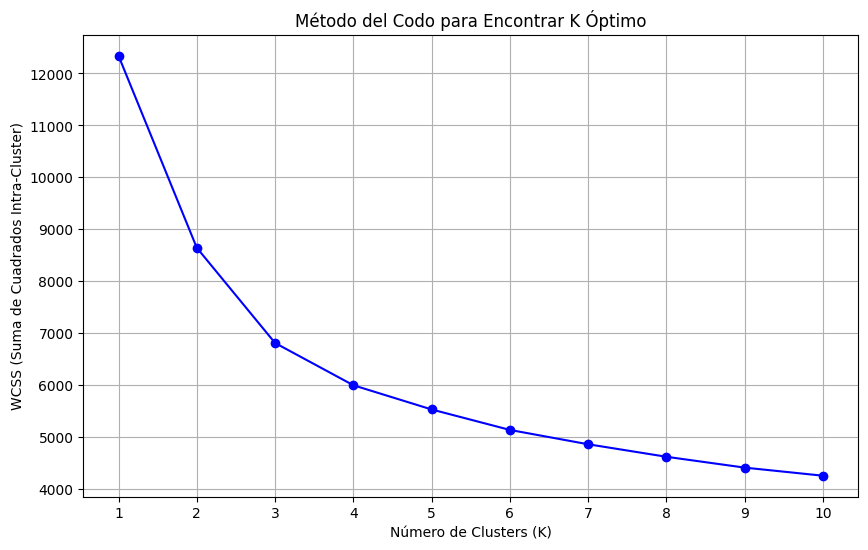

K=2: Silhouette Score = 0.3484
K=3: Silhouette Score = 0.2302
K=4: Silhouette Score = 0.2530
K=5: Silhouette Score = 0.2179
K=6: Silhouette Score = 0.2354
K=7: Silhouette Score = 0.1688
K=8: Silhouette Score = 0.1604
K=9: Silhouette Score = 0.1507
K=10: Silhouette Score = 0.1447
--- Resultado del Análisis de Silueta ---
0.0631222406755407
primer metodo con todas las variables = 0.1602023997412845
segundo metodo con las variables numericas y boleanas solo = 0.2509892226614428


In [9]:

for col in boolean_cols:
    data_clustering_solo_numerical_y_bol[col] = data_clustering_solo_numerical_y_bol[col].astype(int)
    
scaler = StandardScaler()
data_clustering_solo_numerical_y_bol[numerical_cols] = scaler.fit_transform(data_clustering_solo_numerical_y_bol[numerical_cols])
X2 = data_clustering_solo_numerical_y_bol.copy()


wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

# Opcional: Visualización del Método del Codo (guarda el plot)
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='blue')
plt.title('Método del Codo para Encontrar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Suma de Cuadrados Intra-Cluster)')
plt.xticks(K_range)
plt.grid(True)
plt.show()  

#NO SE VE NADA CLARO CUAL ELEGIR, PROBAMOS SILHOUETTE


silhouette_scores = {}
K_range = range(2, 11) 


for k in K_range:
    # Entrenar K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    # Calcular el Silhouette Score
    score = silhouette_score(X2, cluster_labels)
    silhouette_scores[k] = score
    print(f"K={k}: Silhouette Score = {score:.4f}")

# Encontrar el K con la puntuación más alta
K_optimal_silhouette = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[K_optimal_silhouette]

print("--- Resultado del Análisis de Silueta ---")
#RESULTADOS MUY IGUALADOS ENTRE K = 3 Y K = 6 COMO 2 NOS PARECE MUY POCO OPTAMOS POR QUE ES LA QUE MAS VALOR SILHOUTTE QUE ES LA 4

K_OPTIMAL = 4

data_clustering_solo_numerical_y_bol.head()

kmeans_final = KMeans(n_clusters=K_OPTIMAL, init='k-means++', random_state=42, n_init=10)
data_clustering['Clustersolonumybol'] = kmeans_final.fit_predict(X2)

from sklearn.preprocessing import scale
from pyclustertend import hopkins
data_k_means_evaluation = scale(X2)
n_samples = data_k_means_evaluation.shape[0]
hopkins_score = hopkins(data_k_means_evaluation, n_samples)
print(hopkins_score) #0,05 CLUSTERS MALOS no mejora con los cambios

silhouette_avg = silhouette_score(X, data_clustering["Cluster"])
silhouette_avg2 = silhouette_score(X2, data_clustering["Clustersolonumybol"])

print(f"primer metodo con todas las variables = {silhouette_avg}")
print(f"segundo metodo con las variables numericas y boleanas solo = {silhouette_avg2}")


ESTA CLARO QUE CON K MEANS MAL

##GAUSSIAN MIXTURE##

In [10]:
data.info()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score

# --- PASO 2: Selección y Preprocesamiento de Características ---
# Seleccionamos las características numéricas más relevantes para el clustering
features = ['price', 'built_area', 'bedrooms', 'bathrooms']
X = data[features].copy()

# El GMM es sensible a la escala, por lo que estandarizamos las características.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- PASO 3: Determinación del Número Óptimo de Clústeres (k) ---
# Usamos el Criterio de Información Bayesiano (BIC) y el Criterio de Información de Akaike (AIC)
n_components = np.arange(2, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X_scaled) for n in n_components]

# Calculamos BIC y AIC
bic = [m.bic(X_scaled) for m in models]
aic = [m.aic(X_scaled) for m in models]

# Graficamos BIC y AIC
plt.figure(figsize=(10, 5))
plt.plot(n_components, bic, label='BIC', marker='o')
plt.plot(n_components, aic, label='AIC', marker='o')
plt.xlabel('Número de Componentes (k)')
plt.ylabel('Criterio de Información')
plt.title('Criterios de Información (BIC y AIC) para GMM')
plt.legend()
plt.xticks(n_components)
plt.grid(True)
#plt.savefig('bic_aic_gmm.png')
plt.close()

# --- PASO 4: Aplicación de Gaussian Mixture Model (GMM) ---
# Elegiremos el k donde los valores de BIC/AIC son más bajos. 
# Usaremos k=4 por defecto para la demostración, pero debes ajustar este valor 
# basado en la gráfica generada (bic_aic_gmm.png).
optimal_k = 4 

gmm = GaussianMixture(n_components=optimal_k, covariance_type='full', random_state=42)
gmm.fit(X_scaled)
data['cluster_gmm'] = gmm.predict(X_scaled)

# --- PASO 5: Visualización de los Clústeres ---
# Visualizamos los clústeres en las variables 'price' y 'built_area'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['built_area'], data['price'], c=data['cluster_gmm'], cmap='viridis', s=50, alpha=0.6)
plt.title(f'Clústeres de GMM (k={optimal_k})')
plt.xlabel('Área Construida')
plt.ylabel('Precio')
plt.colorbar(scatter, label='Clúster GMM')
#plt.savefig('gmm_clusters.png')
plt.close()

# Exportar resultados con los clústeres asignados
#data.to_csv('datos_con_clusters_gmm.csv', index=False)

#print(f"Se han generado dos gráficos: 'bic_aic_gmm.png' para seleccionar el k óptimo y 'gmm_clusters.png' con la visualización de los clústeres (usando k={optimal_k}).")
#print("El archivo 'datos_con_clusters_gmm.csv' contiene el DataFrame original con la nueva columna 'cluster_gmm'.")

silhouette_avg = silhouette_score(X_scaled, data['cluster_gmm']) 

print(f"El Índice de Silueta promedio es: {silhouette_avg:.4f}")

# Asegúrate de usar los datos escalados (X_scaled) y las etiquetas de cluster (df['cluster_gmm'])
ch_score = calinski_harabasz_score(X_scaled, data['cluster_gmm'])

print(f"El Índice de Calinski-Harabasz es: {ch_score:.4f}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   price              1230 non-null   float64 
 1   zone               1230 non-null   category
 2   neighborhood       1230 non-null   category
 3   built_area         1230 non-null   float64 
 4   usable_area        1230 non-null   float64 
 5   bedrooms           1230 non-null   int64   
 6   bathrooms          1230 non-null   int64   
 7   floor              1230 non-null   float64 
 8   exterior           1230 non-null   category
 9   elevator           1230 non-null   bool    
 10  garage             1230 non-null   bool    
 11  storage_room       1230 non-null   bool    
 12  balcony            1230 non-null   bool    
 13  new                1230 non-null   bool    
 14  condition          1230 non-null   category
 15  year               1230 non-null   float64 
 16  agency

In [11]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Se asume que X_scaled ya ha sido creado en el bloque anterior
# Se asume que n_components = np.arange(2, 11)

lowest_bic = np.infty
best_gmm = None
optimal_k = 0
optimal_cv_type = ''
cv_types = ['spherical', 'tied', 'diag', 'full'] # Los cuatro tipos a probar

# Utilizamos el Silueta anterior (0.4032) como referencia, aunque puede ser que el mejor modelo 
# usando las features mejoradas con un k diferente a 4 lo supere.
silhouette_avg_old = 0.4032

print("\n--- Búsqueda en Malla: k y Tipo de Covarianza ---")
for cv_type in cv_types:
    for n_comp in n_components: 
        # Si el modelo no converge, puede lanzar un error. Usaremos try/except por robustez.
        try:
            gmm_model = GaussianMixture(n_components=n_comp, covariance_type=cv_type, random_state=42)
            gmm_model.fit(X_scaled)
            current_bic = gmm_model.bic(X_scaled)
        
            # Comprobar si es el mejor modelo BIC hasta ahora
            if current_bic < lowest_bic:
                lowest_bic = current_bic
                optimal_k = n_comp
                optimal_cv_type = cv_type
                best_gmm = gmm_model
        except Exception as e:
            # Ignorar modelos que no convergen
            print(f"Advertencia: El modelo k={n_comp}, cv='{cv_type}' falló.")
            continue

print(f"\n✅ Mejor Combinación BIC Encontrada: k={optimal_k}, Covarianza='{optimal_cv_type}'")
print(f"BIC Mínimo: {lowest_bic:.2f}")

# --- Reaplicar GMM con el MEJOR Modelo BIC y Evaluar Silueta ---
if best_gmm is not None:
    data['cluster_gmm_final'] = best_gmm.predict(X_scaled)
    silhouette_avg_final = silhouette_score(X_scaled, data['cluster_gmm_final'])
    
    print(f"\n--- Resultados del Modelo FINAL (k={optimal_k}, {optimal_cv_type}) ---")
    print(f"Índice de Silueta Promedio FINAL: {silhouette_avg_final:.4f}")

    if silhouette_avg_final > silhouette_avg_old:
        print(f"🎉 ¡Éxito! La Silueta final ({silhouette_avg_final:.4f}) superó el resultado inicial de {silhouette_avg_old:.4f}.")
    else:
        print(f"⚠️ El Silueta final ({silhouette_avg_final:.4f}) no superó el valor inicial. El modelo con menor BIC no es el más interpretable.")
else:
    print("❌ No se pudo encontrar un modelo GMM convergente. Revisa la limpieza de datos.")


--- Búsqueda en Malla: k y Tipo de Covarianza ---

✅ Mejor Combinación BIC Encontrada: k=10, Covarianza='diag'
BIC Mínimo: -11179.93

--- Resultados del Modelo FINAL (k=10, diag) ---
Índice de Silueta Promedio FINAL: 0.3518
⚠️ El Silueta final (0.3518) no superó el valor inicial. El modelo con menor BIC no es el más interpretable.


In [12]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import numpy as np



best_silhouette_score = -1
optimal_k_silueta = 0

print("\n--- Búsqueda de k para MAXIMIZAR la Silueta (Modelo Interpretable) ---")
for n_comp in n_components:
    # Usamos 'full' por defecto para dar la mayor flexibilidad a las elipses
    gmm_model = GaussianMixture(n_components=n_comp, covariance_type='full', random_state=42)
    gmm_model.fit(X_scaled)
    
    # Predecir las etiquetas para calcular la Silueta
    cluster_labels = gmm_model.predict(X_scaled)
    current_silhouette = silhouette_score(X_scaled, cluster_labels)
    
    # Comprobar si este es el mejor modelo Silueta
    if current_silhouette > best_silhouette_score:
        best_silhouette_score = current_silhouette
        optimal_k_silueta = n_comp
        
    print(f"k={n_comp}: Silueta={current_silhouette:.4f}")

print(f"\n🏆 Modelo Recomendado por Silueta: k={optimal_k_silueta}")
print(f"Índice de Silueta MÁXIMO: {best_silhouette_score:.4f}")

# --- Aplicación Final ---
final_gmm = GaussianMixture(n_components=optimal_k_silueta, covariance_type='full', random_state=42)
final_gmm.fit(X_scaled)
data['cluster_gmm_final_silueta'] = final_gmm.predict(X_scaled)

if best_silhouette_score > 0.4032:
    print(f"\n🎉 ¡Felicitaciones! El Silueta MÁXIMO ({best_silhouette_score:.4f}) superó tu resultado inicial.")
else:
    print(f"\n⚠️ El Silueta MÁXIMO ({best_silhouette_score:.4f}) es inferior al resultado inicial (0.4032). Usaremos el k que dio este valor máximo.")


--- Búsqueda de k para MAXIMIZAR la Silueta (Modelo Interpretable) ---
k=2: Silueta=0.4768
k=3: Silueta=0.4019
k=4: Silueta=0.4032
k=5: Silueta=0.3960
k=6: Silueta=0.3962
k=7: Silueta=0.3779
k=8: Silueta=0.3248
k=9: Silueta=0.3182
k=10: Silueta=0.3343

🏆 Modelo Recomendado por Silueta: k=2
Índice de Silueta MÁXIMO: 0.4768

🎉 ¡Felicitaciones! El Silueta MÁXIMO (0.4768) superó tu resultado inicial.


In [24]:
import numpy as np
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import time # Para medir la eficiencia

# Se asume que X_scaled ya ha sido creado y es la matriz de datos escalada

# Aplicar BIRCH con un umbral razonable y 5 sub-clústeres (ramificaciones)
# n_clusters=None significa que BIRCH crea tantos clústeres como pueda basado en el threshold.
# Luego, en el segundo paso, se aplica K-Means para reducir estos a un número fijo (ej. 2).
birch_model = Birch(n_clusters=2, threshold=0.2, branching_factor=50)

# El parámetro n_clusters=2 aquí fuerza a que el segundo paso de refinamiento
# (que es K-Means) combine los sub-clústeres en exactamente 2 clústeres finales.
birch_model.fit(X_scaled)
birch_labels = birch_model.predict(X_scaled)
#data['cluster_birch'] = birch_labels


# --- Evaluación del Modelo BIRCH ---
silhouette_birch = silhouette_score(X_scaled, birch_labels)
ch_score_birch = calinski_harabasz_score(X_scaled, birch_labels)

print("\n--- Resultados de Evaluación BIRCH ---")
print(f"Índice de Silueta Promedio (BIRCH, k=2): {silhouette_birch:.4f}")
print(f"Índice de Calinski-Harabasz (BIRCH, k=2): {ch_score_birch:.4f}")


--- Resultados de Evaluación BIRCH ---
Índice de Silueta Promedio (BIRCH, k=2): 0.6283
Índice de Calinski-Harabasz (BIRCH, k=2): 699.9233


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Se asume que X_scaled ya ha sido creado y tiene 5 dimensiones.
min_samples_dbscan = 10 # Regla: 2 * (número de features, que es 5)

# --- Paso 1: Calcular la distancia al k-ésimo vecino más cercano ---
# Usamos k = min_samples - 1 para encontrar la distancia necesaria para ser un punto central.
k_neighbors = NearestNeighbors(n_neighbors=min_samples_dbscan)
k_neighbors.fit(X_scaled)

# distances será una matriz de distancias, indices serán los índices de los vecinos
distances, indices = k_neighbors.kneighbors(X_scaled)

# La última columna es la distancia al k-ésimo vecino
distances = np.sort(distances[:, min_samples_dbscan-1], axis=0)

# --- Paso 2: Graficar y buscar el codo ---
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title(f'Gráfico de Distancia k={min_samples_dbscan}')
plt.xlabel('Puntos de Datos (Ordenados por Distancia)')
plt.ylabel('Distancia al k-ésimo Vecino')
plt.grid(True)
# plt.savefig('dbscan_k_distance_graph.png')
plt.close()

# Deberías inspeccionar el gráfico para encontrar el 'codo' que define el eps.
# Asumiremos un valor de eps=0.5 basado en la práctica común para datos escalados, 
# pero la inspección visual es clave.
eps_estimado = 0.75
print(f"La distancia crítica (codo) para elegir 'eps' es mejor buscarla en el gráfico.")
print(f"Usaremos un valor inicial de eps={eps_estimado} y min_samples={min_samples_dbscan} para DBSCAN.")

# --- Paso 3: Aplicar DBSCAN ---
dbscan = DBSCAN(eps=eps_estimado, min_samples=min_samples_dbscan)
dbscan_labels = dbscan.fit_predict(X_scaled)
data['cluster_dbscan'] = dbscan_labels

# --- Paso 4: Evaluación ---
# El clúster -1 representa ruido y debe ser excluido para calcular la Silueta
n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

if n_clusters < 2:
    silhouette_dbscan = 0.0 # No se pudo calcular Silueta si hay < 2 clústeres
    print("\n❌ Advertencia: DBSCAN encontró 0 o 1 clústeres (excluyendo ruido). Ajusta 'eps'.")
else:
    # Calcular Silueta solo para los puntos que NO son ruido (etiqueta -1)
    core_samples_mask = dbscan_labels != -1
    silhouette_dbscan = silhouette_score(X_scaled[core_samples_mask], dbscan_labels[core_samples_mask])

    # El Calinski-Harabasz SÍ requiere que se incluyan todos los puntos.
    ch_score_dbscan = calinski_harabasz_score(X_scaled, dbscan_labels)

    print("\n--- Resultados de Evaluación DBSCAN ---")
    print(f"Número de Clústeres detectados (sin ruido): {n_clusters}")
    print(f"Puntos clasificados como Ruido (-1): {np.sum(dbscan_labels == -1)}")
    print(f"Índice de Silueta Promedio (Excluyendo Ruido): {silhouette_dbscan:.4f}")
    print(f"Índice de Calinski-Harabasz (Incluyendo Ruido): {ch_score_dbscan:.4f}")

La distancia crítica (codo) para elegir 'eps' es mejor buscarla en el gráfico.
Usaremos un valor inicial de eps=0.75 y min_samples=10 para DBSCAN.

--- Resultados de Evaluación DBSCAN ---
Número de Clústeres detectados (sin ruido): 3
Puntos clasificados como Ruido (-1): 119
Índice de Silueta Promedio (Excluyendo Ruido): 0.4528
Índice de Calinski-Harabasz (Incluyendo Ruido): 651.0742


In [13]:
"""
# --- 5. ANÁLISIS DE RESULTADOS ---

print("\n--- Resultados del Clustering K-Means ---")
print(f"Número óptimo de clusters (K) elegido: {K_OPTIMAL}")

print("\nConteo de propiedades por Cluster:")
print(data_clustering['Cluster'].value_counts().sort_index())

print("\nValores medios de características numéricas por Cluster:")
print(data_clustering.groupby('Cluster')[numerical_cols].mean().round(2))

categorical_cols = ["zone", "neighborhood", "exterior", "condition", "consumption_label", "emissions_label"]

print("\n### Distribución de Frecuencias de Variables Categóricas por Cluster ###")

for col in categorical_cols:
    print(f"\n--- Variable: {col.upper()} ---")
    
    # Crea una tabla cruzada: Cluster vs. Categoría
    cross_tab = pd.crosstab(data_clustering['Cluster'], data_clustering[col])
    
    # Normaliza por fila (por Cluster) para ver los porcentajes
    # Esto te dice qué porcentaje de cada Cluster cae en cada categoría
    normalized_cross_tab = cross_tab.apply(lambda r: r/r.sum(), axis=1)
    
    # Muestra los porcentajes redondeados
    print(normalized_cross_tab.round(3).to_string())
    
data_processed.head()
data_clustering.head()
"""




'\n# --- 5. ANÁLISIS DE RESULTADOS ---\n\nprint("\n--- Resultados del Clustering K-Means ---")\nprint(f"Número óptimo de clusters (K) elegido: {K_OPTIMAL}")\n\nprint("\nConteo de propiedades por Cluster:")\nprint(data_clustering[\'Cluster\'].value_counts().sort_index())\n\nprint("\nValores medios de características numéricas por Cluster:")\nprint(data_clustering.groupby(\'Cluster\')[numerical_cols].mean().round(2))\n\ncategorical_cols = ["zone", "neighborhood", "exterior", "condition", "consumption_label", "emissions_label"]\n\nprint("\n### Distribución de Frecuencias de Variables Categóricas por Cluster ###")\n\nfor col in categorical_cols:\n    print(f"\n--- Variable: {col.upper()} ---")\n\n    # Crea una tabla cruzada: Cluster vs. Categoría\n    cross_tab = pd.crosstab(data_clustering[\'Cluster\'], data_clustering[col])\n\n    # Normaliza por fila (por Cluster) para ver los porcentajes\n    # Esto te dice qué porcentaje de cada Cluster cae en cada categoría\n    normalized_cross_tab